# Introdução



Este dataset tem origem da dissertação de mestrado de Manoel Valerio da Silveira Neto. https://github.com/manoelvsneto/tdmining <br>
<br>
https://www.ppgia.pucpr.br/pt/?q=node/295
<br>

<br> Onde foi analisado dados de code smell 2003 até 2020 do produto WORDPRESS. Foram gerados 2TB de dados BRUTOS em 6 meses de processamento continuo. Destes 2Tb, após processo de transformação e limpeza, 2Gb os dados limpos para utilização. Os dados apresentados no CSV a seguir comtempla apenas uma visão da informação.  Code Smell x Desenvolvedor x Tempo x Severidade. <br>


Em ciência da computação, um code smell é qualquer característica do código fonte de um programa de computador que indique a possibilidade de um problema mais profundo no sistema. Determinar o que é um code smell é um processo subjetivo e depende da linguagem de programação, do paradigma de programação, e da experiência do programador. O termo foi popularizado por Kent Beck na WardsWiki no final dos anos 90. O uso do termo passou a aumentar após a publicação do livro Refactoring: Improving the Design of Existing Code de Martin Fowler, em 1999. O termo é também usado na metodologia de desenvolvimento ágil.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# origem dos dados, a dissertacao do mestrado https://github.com/manoelvsneto/tdmining

df = pd.read_csv('https://www.archse.eng.br/CODE_SMELL_WORDPRESS.csv', low_memory=False)
df.columns = df.columns.str.strip()
df = df.dropna(subset=['EFFORT_MINUTES'])
df['EFFORT_MINUTES'] = df['EFFORT_MINUTES'].astype(int)

# Loop through each column in the DataFrame
for col in df.select_dtypes(['object']).columns:
    df[col] = df[col].apply(lambda x: x.strip() if isinstance(x, str) else x)

# Exibir os primeiros registros de code smell  <br>




ID_DEVELOPER: Identificador do desenvolvedor. <br>
ID_RULE: Identificador da regra violada.  <br>
RULE_NAME: Nome da regra de code smell violada.  <br>
RULE_DESCRIPTION: Descrição da regra.  <br>
ACTION_DESCRIPTION: Descrição da ação tomada.  <br>
TD_ITEM_DESCRIPTION: Descrição do code smell técnico.  <br>
SEVERITY_DESCRIPTION: Descrição da severidade.  <br>
ID_TIME: Identificador de tempo.   <br>
DATE: Data do registro.  <br>
VERSION_NAME: Nome da versão do software.  <br>

In [37]:
df.head(5)

,EFFORT_MINUTES,ID_DEVELOPER,ID_RULE,RULE_NAME,RULE_DESCRIPTION,ACTION_DESCRIPTION,TD_ITEM_DESCRIPTION,SEVERITY_DESCRIPTION,ID_TIME,DATE,VERSION_NAME,Severity_Score
0,1,83,447,A close curly brace should be located at the b...,S1109,OPEN,CS,MINOR,1187,2003-04-01,Point Sever Beta Test,4
1,1,83,447,A close curly brace should be located at the b...,S1109,OPEN,CS,MINOR,1187,2003-04-01,Point Sever Beta Test,4
2,1,83,447,A close curly brace should be located at the b...,S1109,OPEN,CS,MINOR,1187,2003-04-01,Point Sever Beta Test,4
3,1,83,447,A close curly brace should be located at the b...,S1109,OPEN,CS,MINOR,1187,2003-04-01,Point Sever Beta Test,4
4,1,83,447,A close curly brace should be located at the b...,S1109,OPEN,CS,MINOR,1187,2003-04-01,Point Sever Beta Test,4


#  February 28th - Lecture 1 –  Basic Statistics

In [53]:
import pandas as pd

# Carregar os dados
data = df

# Gerando estatísticas descritivas para todas as colunas numéricas
descriptive_stats = data.describe()

# Para incluir também variáveis categóricas na análise descritiva
# Isso incluirá contagens, valores únicos, moda e frequência da moda
descriptive_stats_categorical = data.describe(include='all')

# Exibir estatísticas descritivas para dados numéricos
print("Estatísticas Descritivas para Dados Numéricos:")
print(descriptive_stats)

# Exibir estatísticas descritivas para todas as colunas, incluindo categóricas
print("\nEstatísticas Descritivas para Todas as Colunas:")
print(descriptive_stats_categorical)

Estatísticas Descritivas para Dados Numéricos:
       EFFORT_MINUTES   ID_DEVELOPER        ID_RULE        ID_TIME  \
count   152969.000000  152969.000000  152969.000000  152969.000000   
mean         8.029836      69.969922    3432.215900    4334.424073   
min          1.000000       1.000000       3.000000    1187.000000   
25%          2.000000      24.000000    1437.000000    3031.000000   
50%          5.000000      83.000000    3837.000000    4233.000000   
75%         10.000000     110.000000    5182.000000    5760.000000   
max       8590.000000     122.000000    6107.000000    7379.000000   
std         40.124040      41.348844    1984.945637    1671.690490   

                                DATE  Severity_Score  
count                         152969   152969.000000  
mean   2011-11-12 10:10:39.894357760        2.381862  
min              2003-04-01 00:00:00        1.000000  
25%              2008-04-18 00:00:00        2.000000  
50%              2011-08-03 00:00:00        2.0

# March 6th - Lecture 2 – Univariate data analysis


A análise de dados univariada é um tipo de análise estatística que foca em uma única variável. O objetivo principal é descrever e resumir os dados dessa única variável e encontrar padrões que possam existir dentro dela.

### Soma de esforço em minutos por severidade.

In [ ]:
grouped_data = df.groupby('SEVERITY_DESCRIPTION')['EFFORT_MINUTES'].sum().reset_index()

# Display the result
print(grouped_data)

  SEVERITY_DESCRIPTION  EFFORT_MINUTES
0              BLOCKER           10704
1             CRITICAL          819332
2                MAJOR          345768
3                MINOR           52512


Soma de esforço por regra de code smell, quando o code smell ainda não foi resolvido ( OPEN ) <BR> vhttps://rules.sonarsource.com/php/RSPEC-1192/?search=%20String%20literals%20should%20not%20be%20duplicate

In [ ]:
# Filter the DataFrame for rows where ACTION_DESCRIPTION equals 'open'
filtered_df = df[df['ACTION_DESCRIPTION'].str.lower() == 'open']

# Group by 'RULE_NAME', sum 'EFFORT_MINUTES', and then sort the results in descending order
grouped_sorted = filtered_df.groupby('RULE_NAME')['EFFORT_MINUTES'].sum().reset_index().sort_values(by='EFFORT_MINUTES', ascending=False)

# Display the result
print(grouped_sorted)

                                            RULE_NAME  EFFORT_MINUTES
73           String literals should not be duplicated          396140
71  Source files should not have any duplicated bl...           63630
33         Control structures should use curly braces           53012
27  Cognitive Complexity of functions should not b...           50194
44  Functions should not contain too many return s...           32740
..                                                ...             ...
63   Parameters should be passed in the correct order               5
5               "delete" should not be used on arrays               5
4                    "default" clauses should be last               5
2         "catch" clauses should do more than rethrow               5
35                Duplicate imports should be removed               2

[92 rows x 2 columns]


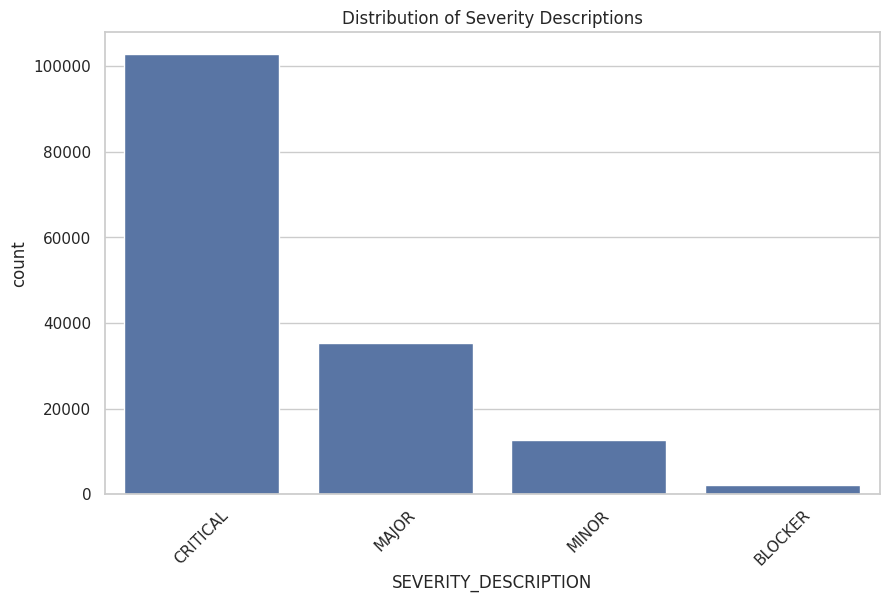

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting the distribution of 'SEVERITY_DESCRIPTION'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='SEVERITY_DESCRIPTION', order=df['SEVERITY_DESCRIPTION'].value_counts().index)
plt.title('Distribution of Severity Descriptions')
plt.xticks(rotation=45)
plt.show()

O gráfico anterior de barras para a distribuição de severidade de code smell, apresenta que a quantidade de code smell CRITICAL são os com maior representatividade no projeto do WORDPRESS.

Análise de Tendências ao Longo do Tempo
Podemos analisar como algumas métricas mudam ao longo do tempo. Por exemplo, a frequência de severidade de code smell ao longo do tempo.

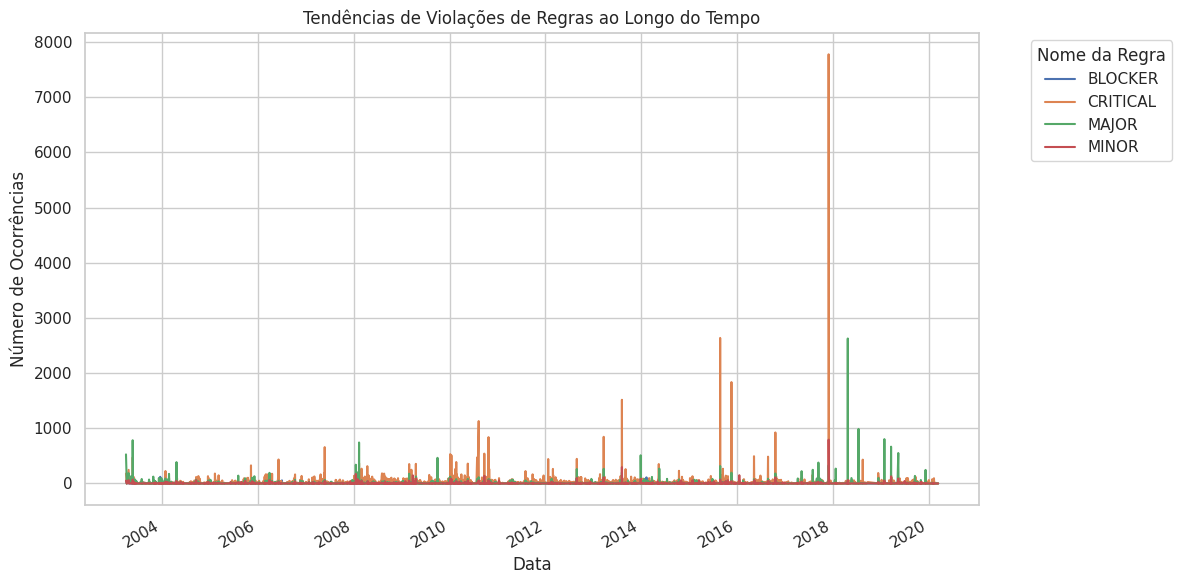

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertendo a coluna DATE para datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Agrupando por data e contando ocorrências de cada regra
trend_analysis = df.groupby('DATE')['SEVERITY_DESCRIPTION'].value_counts().unstack().fillna(0)

# Plotando
ax = trend_analysis.plot(figsize=(12, 6), title='Tendências de code smell por severidade ao longo do tempo')
plt.ylabel('Número de Ocorrências')
plt.xlabel('Data')

# Colocando a legenda fora do gráfico, à direita
ax.legend(title='Nome da Regra', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Necessário entender no gráfico acima por que em 2018 houve uma grande quantidade de code smell CRITICAL.

Sumarização dos Desenvolvedores em atribuição ao code smell ( não determina se foi quem criou o code smell ou quem resolveu o code smell)

In [13]:
# Contando o número de ocorrências por desenvolvedor
developer_counts = df['ID_DEVELOPER'].value_counts()

# Exibindo os top 10 desenvolvedores com mais registros
print(developer_counts.head(10))

ID_DEVELOPER
110    39293
12     17418
13     12498
83     11471
42     11303
112     9450
81      5073
100     4193
17      3638
24      3340
Name: count, dtype: int64


Distribuição de Violações por Versão do Software
Isso pode revelar se certas versões são mais propensas a problemas ou se melhorias estão sendo efetivas.

In [15]:
import pandas as pd

# Supondo que 'data' já esteja carregado

# Contagem de violações por versão do software
version_counts = df['VERSION_NAME'].value_counts().sort_values(ascending=False)

# Convertendo a série em um DataFrame para melhor visualização
version_table = pd.DataFrame(version_counts)
version_table.reset_index(inplace=True)
version_table.columns = ['Version', 'Count']

# Exibindo a tabela
print(version_table)

                                              Version  Count
0    WordPress 4.9.2 Security and Maintenance Release   9025
1                                     WordPress 2.9.2   4316
2                               Android Update: 1.3.8   4026
3                                WordPress 2.8 Beta 1   3983
4    WordPress 4.3.1 Security and Maintenance Release   3876
..                                                ...    ...
287                                   WordPress 2.8.1      2
288                             1.2 Release Candidate      2
289                   WordPress 5.1 Release Candidate      2
290                               WordPress 5.1 Betty      1
291                               WordPress 4.8 Evans      1

[292 rows x 2 columns]


a versão: "WordPress 4.9.2 Security and Maintenance Release" foi onde mais apareceu code smell.

# March 13th - Lecture 3 – Multivariate data analysis


A análise multivariada é um conjunto de técnicas utilizadas para analisar dados que envolvem múltiplas variáveis ao mesmo tempo. Este tipo de análise é fundamental para entender as relações e interações entre as variáveis e para investigar como elas contribuem conjuntamente para os fenômenos observados.

Análise de Correlação entre Violadores Frequentes e Severidade
Supondo que a severidade possa ter algum valor numérico ou ranking, podemos converter as descrições em valores numéricos e verificar se há uma correlação entre os desenvolvedores que mais violam regras e a severidade das violações.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt


# Supondo que a severidade possa ser convertida em um valor numérico
severity_mapping = {'BLOCKER': 1, 'CRITICAL': 2, 'MAJOR': 3,'MINOR': 4 }
df['Severity_Score'] = df['SEVERITY_DESCRIPTION'].map(severity_mapping)

# Agrupando por desenvolvedor e calculando a média da severidade
developer_severity = df.groupby('ID_DEVELOPER')['Severity_Score'].mean()

# Contando as violações por desenvolvedor
violation_counts = df['ID_DEVELOPER'].value_counts()

# Criando um DataFrame para correlação
correlation_data = pd.DataFrame({
    'Violation_Count': violation_counts,
    'Average_Severity': developer_severity
})

# Calculando a correlação
correlation = correlation_data.corr()
print(correlation)


                  Violation_Count  Average_Severity
Violation_Count          1.000000         -0.048438
Average_Severity        -0.048438          1.000000


Clusterização para Identificar Padrões de Violações
Utilizaremos um método de clusterização, como K-means, para agrupar os desenvolvedores com base no número de violações e na severidade média das mesmas.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


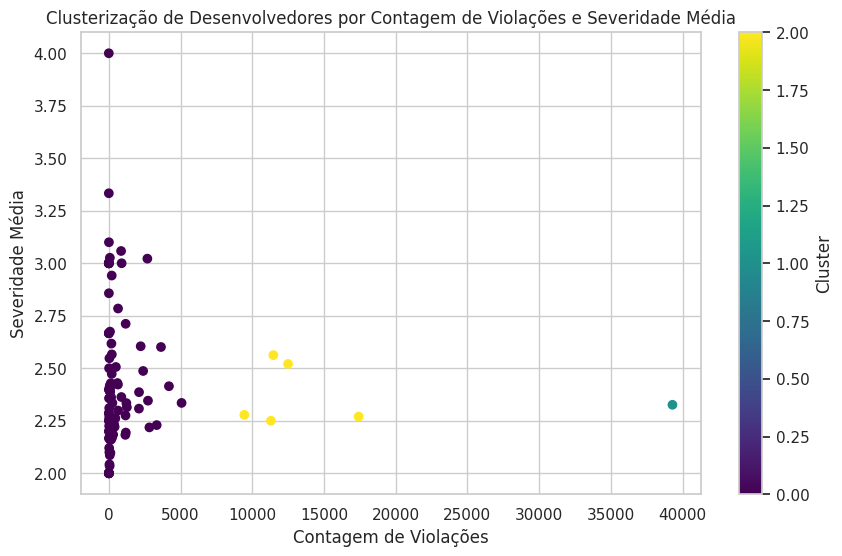

In [32]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Preparando os dados para a clusterização
cluster_data = correlation_data.dropna()

# Executando K-means com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(cluster_data)

# Adicionando as etiquetas dos clusters ao dataset original
cluster_data['Cluster'] = kmeans.labels_

# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.scatter(cluster_data['Violation_Count'], cluster_data['Average_Severity'], c=cluster_data['Cluster'], cmap='viridis')
plt.title('Clusterização de Desenvolvedores por Contagem de Violações e Severidade Média')
plt.xlabel('Contagem de Violações')
plt.ylabel('Severidade Média')
plt.colorbar(label='Cluster')
plt.show()

# March 20nd - Lecture 4 – Correlations

Em estatística, a correlação é uma medida que quantifica o grau de relação entre duas variáveis numéricas. A correlação pode ajudar a entender como uma variável pode prever outra e pode indicar a força e a direção dessa relação.

 "SEVERITY_DESCRIPTION" possa ser mapeada em uma escala numérica e que você tenha algum sistema de pontos ou contagem para "ID_DEVELOPER" e "ID_RULE". Aqui está como você poderia fazer isso e então calcular a matriz de correlação:

In [55]:
import pandas as pd

data = df

# Suponha que temos mapeamentos para severidade
severity_mapping = {'BLOCKER': 1, 'CRITICAL': 2, 'MAJOR': 3,'MINOR': 4 }
data['Severity_Score'] = data['SEVERITY_DESCRIPTION'].map(severity_mapping)

# Convertendo IDs para numérico se necessário (assumindo que já são numéricos aqui)
data['ID_DEVELOPER'] = data['ID_DEVELOPER'].astype(int)

# Selecionando apenas as colunas numéricas para a correlação
numeric_cols = ['ID_DEVELOPER', 'Severity_Score']
correlation_matrix = data[numeric_cols].corr()

# Exibindo a matriz de correlação
print(correlation_matrix)


                ID_DEVELOPER  Severity_Score
ID_DEVELOPER        1.000000       -0.043376
Severity_Score     -0.043376        1.000000


Interpretação da Matriz de Correlação
Correlação entre ID_DEVELOPER e Severity_Score: O valor de -0.043376 indica uma correlação negativa fraca entre o desenvolvedor e a severidade das violações. Essa correlação quase nula sugere que não há uma relação linear significativa entre quem é o desenvolvedor e a severidade das violações que ele comete.


# March 27th - Lecture 5 – Enhanced data visualization

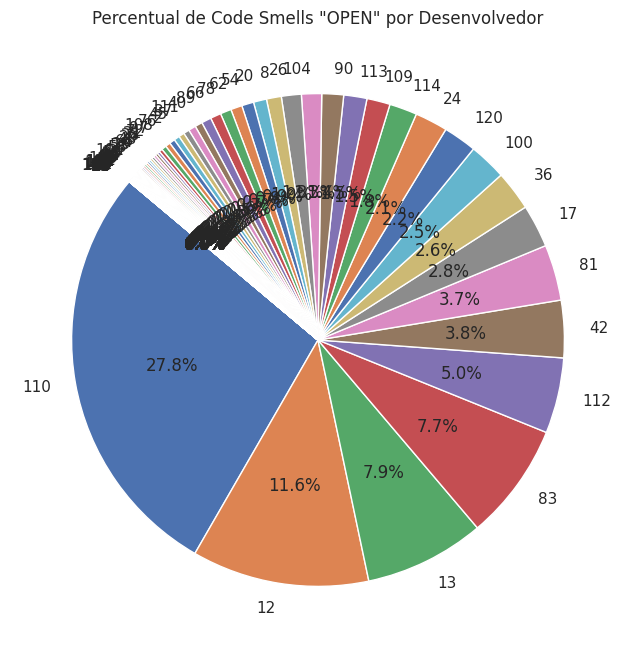

In [49]:
import pandas as pd
import matplotlib.pyplot as plt


# Filtrar apenas os code smells que estão 'OPEN'
open_smells = df[df['ACTION_DESCRIPTION'] == 'OPEN']

# Contar quantas vezes cada desenvolvedor tem um code smell 'OPEN'
developer_counts = open_smells['ID_DEVELOPER'].value_counts()

# Calculando o percentual para cada desenvolvedor
developer_percent = developer_counts / developer_counts.sum() * 100

# Plotando o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(developer_percent, labels=developer_percent.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentual de Code Smells "OPEN" por Desenvolvedor')
plt.show()

O gráfico de pizza apresenta que 27.8% dos code smells abertos, ainda não resolvidos foram criados pelo desenvolvedor 110.


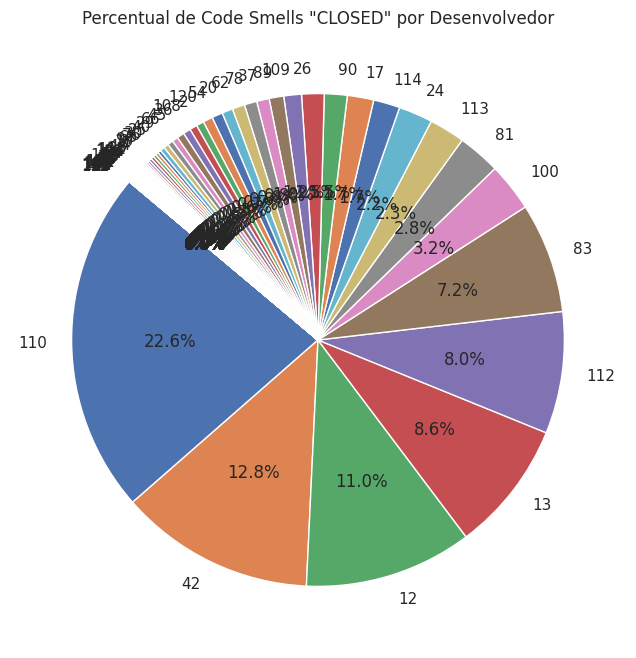

In [50]:
import pandas as pd
import matplotlib.pyplot as plt


# Filtrar apenas os code smells que estão 'OPEN'
open_smells = df[df['ACTION_DESCRIPTION'] == 'CLOSED']

# Contar quantas vezes cada desenvolvedor tem um code smell 'OPEN'
developer_counts = open_smells['ID_DEVELOPER'].value_counts()

# Calculando o percentual para cada desenvolvedor
developer_percent = developer_counts / developer_counts.sum() * 100

# Plotando o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(developer_percent, labels=developer_percent.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentual de Code Smells "CLOSED" por Desenvolvedor')
plt.show()

O gráfico de pizza apresenta que 22.6% dos code smells FECHADOS foram resolvidos pelo desenvolvedor 110.

# April 3th – Lecture 6 – Missing data & outliers

No dataset não há dados faltantes ou outliers

# April 10th - Lecture 7 – PCA and t-SNE


PCA (Principal Component Analysis) e t-SNE (t-Distributed Stochastic Neighbor Embedding) são duas técnicas avançadas de redução de dimensionalidade usadas frequentemente em análise de dados, particularmente úteis para visualização de dados de alta dimensão. Ambas as técnicas ajudam a simplificar os dados enquanto retêm características importantes, mas são usadas de maneiras ligeiramente diferentes e têm diferentes propriedades matemáticas.

PCA (Principal Component Analysis)
PCA é uma técnica estatística que transforma um conjunto de variáveis possivelmente correlacionadas em um número menor de variáveis não correlacionadas chamadas componentes principais. O primeiro componente principal tem a maior variância possível (ou seja, captura a maior parte da informação ou variabilidade nos dados), e cada componente subsequente, enquanto ortogonal aos anteriores, tem a próxima maior variância possível.

Usos do PCA:
Redução de Dimensionalidade: Reduz o número de variáveis do dataset, minimizando a perda de informação.
Visualização de Dados: Facilita a visualização de padrões complexos ao reduzir dados multivariados para duas ou três principais componentes.
Eficiência Computacional: Reduzir a dimensionalidade pode melhorar a eficiência de outros algoritmos de machine learning aplicados aos dados.
t-SNE (t-Distributed Stochastic Neighbor Embedding)
t-SNE é uma técnica de redução de dimensionalidade especialmente adequada para a visualização de conjuntos de dados de alta dimensão. Diferente do PCA, que é uma técnica linear, o t-SNE é uma técnica não linear que é particularmente boa em capturar a estrutura local de dados complexos e revelar agrupamentos em um espaço de menor dimensão.

Características do t-SNE:
Preservação da Vizinhança: t-SNE converte afinidades de pontos em probabilidades. Pontos que são próximos uns dos outros têm uma alta probabilidade de serem escolhidos, enquanto pontos distantes têm uma probabilidade praticamente nula de serem escolhidos.
Visualização de Clusters: Muito eficaz para visualizar clusters de dados em um espaço de baixa dimensão (geralmente 2D ou 3D).
Comparação entre PCA e t-SNE
Linear vs. Não-linear: PCA é uma técnica linear, o que significa que é ótima para encontrar relações lineares nas variáveis. Já o t-SNE é não-linear, adequado para detectar relações complexas que não são percebíveis por PCA.
Escalabilidade: PCA tende a ser mais rápido e é mais fácil de aplicar em grandes datasets em comparação ao t-SNE, que pode se tornar computacionalmente intensivo.
Uso de Informação: PCA tenta preservar a variância global, enquanto t-SNE foca mais na estrutura local dos dados.

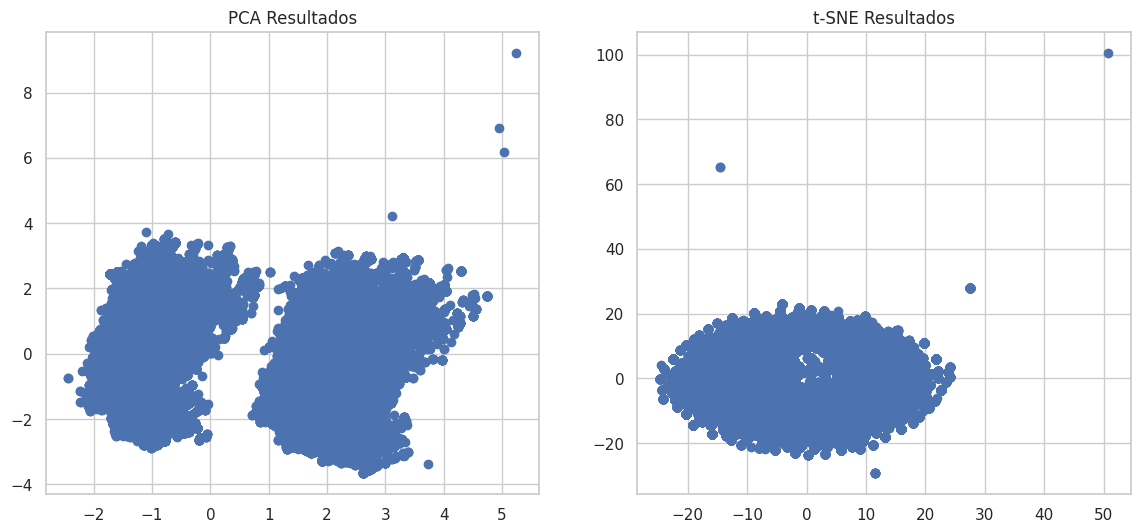

In [56]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

#  colunas categóricas
categorical_cols = ['ACTION_DESCRIPTION', 'SEVERITY_DESCRIPTION', 'VERSION_NAME']


# Codificação One-hot
onehot_encoder = OneHotEncoder()
categorical_encoded = onehot_encoder.fit_transform(data[categorical_cols]).toarray()
categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=onehot_encoder.get_feature_names_out(categorical_cols))

# Concatenar com outras colunas numéricas (ajuste as colunas conforme necessário)
numeric_cols = data.select_dtypes(include=['int', 'float']).drop(columns=categorical_cols, errors='ignore')
data_processed = pd.concat([numeric_cols, categorical_encoded_df], axis=1)

# Normalizando os dados
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_processed)

# Aplicando PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_normalized)

# Aplicando t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(data_normalized)

# Plotando os resultados
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA Resultados')

plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
plt.title('t-SNE Resultados')

plt.show()